# Import File and Libraries

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt

In [332]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [333]:
# Read file in as Pandas dataframe

dfh = pd.read_csv('kc3_house_data.csv')
dfh.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,distance_from_city,SD_Auburn,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,7.622786,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,7.766476,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,8.561145,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,6.655340,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,7.402273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [334]:
dfh = dfh[(dfh['price'] >= 0) & (dfh['price'] <= 750000)]

In [122]:
dfh.corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,distance_from_city,SD_Auburn,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
price,1.000000,0.295275,0.440243,0.269486,0.051813,0.213120,0.033946,0.617743,-0.446591,-0.144352,...,0.151901,0.057980,-0.134845,-0.028171,0.177952,-0.054207,0.004411,-0.092646,-0.134811,0.002460
bedrooms,0.295275,1.000000,0.499567,0.157301,-0.027363,0.031535,0.023294,0.330037,0.055840,0.022652,...,0.043373,0.043239,0.003647,-0.015791,-0.190948,-0.029215,0.012861,0.024093,-0.042868,-0.047336
bathrooms,0.440243,0.499567,1.000000,0.504069,-0.006228,0.080674,-0.139028,0.608200,0.071443,0.012534,...,0.024306,0.057954,-0.037911,0.023002,-0.155317,-0.097621,0.064524,0.081578,-0.100783,-0.015604
floors,0.269486,0.157301,0.504069,1.000000,-0.006607,-0.018082,-0.278563,0.457574,-0.011586,0.010776,...,-0.029642,0.006267,-0.053019,0.036502,0.066382,-0.085585,0.065331,0.086554,-0.067547,-0.007576
waterfront,0.051813,-0.027363,-0.006228,-0.006607,1.000000,0.282320,0.011941,-0.013079,0.021937,-0.008361,...,-0.004283,-0.010903,0.022314,-0.006245,-0.025348,-0.014463,-0.008647,-0.008647,-0.005811,0.234570
view,0.213120,0.031535,0.080674,-0.018082,0.282320,1.000000,0.030999,0.114924,-0.007603,-0.019088,...,0.006841,-0.033534,0.025620,-0.016366,0.042993,0.000086,0.014969,-0.037597,-0.027609,0.110241
condition,0.033946,0.023294,-0.139028,-0.278563,0.011941,0.030999,1.000000,-0.174140,-0.041677,0.017659,...,0.057286,-0.037819,0.030179,-0.057926,0.028544,0.024255,-0.077631,-0.056578,-0.028867,0.033044
grade,0.617743,0.330037,0.608200,0.457574,-0.013079,0.114924,-0.174140,1.000000,-0.023782,-0.011860,...,0.059830,0.091954,-0.083391,-0.010609,-0.129685,-0.081969,0.021898,0.013719,-0.114563,-0.018956
distance_from_city,-0.446591,0.055840,0.071443,-0.011586,0.021937,-0.007603,-0.041677,-0.023782,1.000000,0.312246,...,-0.083463,0.006807,-0.047193,0.110207,-0.535000,-0.047225,0.247766,0.244521,-0.029400,0.056300
SD_Auburn,-0.144352,0.022652,0.012534,0.010776,-0.008361,-0.019088,0.017659,-0.011860,0.312246,1.000000,...,-0.014372,-0.036587,-0.036858,-0.020956,-0.100261,-0.048534,-0.029015,-0.029015,-0.019501,-0.012701


In [85]:
abs(dfh.corr()) > 0.75

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,distance_from_city,SD_Auburn,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
distance_from_city,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
SD_Auburn,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# Linear Regression Using Statsmodels

In [174]:
# Run regressions of remaining feature variables to assess individual impact on model

formula = 'price ~ grade'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:08:52   Log-Likelihood:            -2.6888e+05
No. Observations:               20116   AIC:                         5.378e+05
Df Residuals:                   20114   BIC:                         5.378e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.321e+05   8150.137    -53.015      0.000   -4.48e+05   -4.16e+05
grade       1.199e+05   1076.196    111.410      0.000    1.18e+05    1.22e+05
==============================================================================
Omnibus:                      945.875   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1082.981
Skew:                           0.562   Prob(JB):                    6.82e-236
Kurtosis:                       3.175   Cond. No.                         57.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
formula = 'price ~ distance_from_city'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     5011.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:53:21   Log-Likelihood:            -2.7148e+05
No. Observations:               20116   AIC:                         5.430e+05
Df Residuals:                   20114   BIC:                         5.430e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.082e+05   2338.582    260.061      0.000    6.04e+05    6.13e+05
distance_from_city -1.407e+04    198.762    -70.789      0.000   -1.45e+04   -1.37e+04
==============================================================================
Omnibus:                      999.352   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1156.241
Skew:                           0.587   Prob(JB):                    8.42e-252
Kurtosis:                       3.010   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
formula = 'price ~ bedrooms'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1921.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:41:20   Log-Likelihood:            -2.7280e+05
No. Observations:               20116   AIC:                         5.456e+05
Df Residuals:                   20114   BIC:                         5.456e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.463e+05   5222.888     47.163      0.000    2.36e+05    2.57e+05
bedrooms    6.678e+04   1523.638     43.831      0.000    6.38e+04    6.98e+04
==============================================================================
Omnibus:                     1045.592   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.031
Skew:                           0.569   Prob(JB):                    5.67e-252
Kurtosis:                       2.704   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
formula = 'price ~ bathrooms'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     4836.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:41:33   Log-Likelihood:            -2.7155e+05
No. Observations:               20116   AIC:                         5.431e+05
Df Residuals:                   20114   BIC:                         5.431e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.153e+05   3837.971     56.096      0.000    2.08e+05    2.23e+05
bathrooms   1.239e+05   1782.443     69.538      0.000     1.2e+05    1.27e+05
==============================================================================
Omnibus:                     1019.534   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1172.110
Skew:                           0.586   Prob(JB):                    3.02e-255
Kurtosis:                       2.845   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
formula = 'price ~ floors'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1575.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:41:45   Log-Likelihood:            -2.7296e+05
No. Observations:               20116   AIC:                         5.459e+05
Df Residuals:                   20114   BIC:                         5.459e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.226e+05   3894.285     82.833      0.000    3.15e+05     3.3e+05
floors      9.872e+04   2487.317     39.688      0.000    9.38e+04    1.04e+05
==============================================================================
Omnibus:                     1198.932   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1368.199
Skew:                           0.623   Prob(JB):                    7.93e-298
Kurtosis:                       2.716   Cond. No.                         6.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
formula = 'price ~ waterfront'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     54.14
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           1.93e-13
Time:                        19:41:56   Log-Likelihood:            -2.7369e+05
No. Observations:               20116   AIC:                         5.474e+05
Df Residuals:                   20114   BIC:                         5.474e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.673e+05   1384.856    337.417      0.000    4.65e+05     4.7e+05
waterfront  2.044e+05   2.78e+04      7.358      0.000     1.5e+05    2.59e+05
==============================================================================
Omnibus:                     1235.207   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1399.567
Skew:                           0.627   Prob(JB):                    1.22e-304
Kurtosis:                       2.687   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
formula = 'price ~ view'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     957.1
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          2.47e-205
Time:                        19:42:06   Log-Likelihood:            -2.7325e+05
No. Observations:               20116   AIC:                         5.465e+05
Df Residuals:                   20114   BIC:                         5.465e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.568e+05   1398.570    326.654      0.000    4.54e+05     4.6e+05
view        6.768e+04   2187.592     30.936      0.000    6.34e+04     7.2e+04
==============================================================================
Omnibus:                     1176.095   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1358.946
Skew:                           0.625   Prob(JB):                    8.10e-296
Kurtosis:                       2.761   Cond. No.                         1.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
formula = 'price ~ condition'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     23.20
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           1.47e-06
Time:                        19:42:40   Log-Likelihood:            -2.7371e+05
No. Observations:               20116   AIC:                         5.474e+05
Df Residuals:                   20114   BIC:                         5.474e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.326e+05   7428.590     58.238      0.000    4.18e+05    4.47e+05
condition   1.032e+04   2143.149      4.817      0.000    6123.047    1.45e+04
==============================================================================
Omnibus:                     1231.672   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1395.816
Skew:                           0.626   Prob(JB):                    7.99e-304
Kurtosis:                       2.689   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [322]:
# Run regression model on all significant features

outcome = 'price'
predictors = dfh.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [323]:
model = ols(formula=formula, data=dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1328.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:33:42   Log-Likelihood:            -2.3079e+05
No. Observations:               18001   AIC:                         4.616e+05
Df Residuals:                   17975   BIC:                         4.618e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.037e+05   8342.473    -24.412      0.000    -2.2e+05   -1.87e+05
bedrooms             1.779e+04    920.216     19.338      0.000     1.6e+04    1.96e+04
bathrooms            3.023e+04   1457.662     20.741      0.000    2.74e+04    3.31e+04
floors              -7930.1982   1583.357     -5.008      0.000    -1.1e+04   -4826.667
waterfront           9.761e+04    1.7e+04      5.728      0.000    6.42e+04    1.31e+05
view                 3.164e+04   1315.743     24.049      0.000    2.91e+04    3.42e+04
condition            2.685e+04   1102.838     24.342      0.000    2.47e+04     2.9e+04
grade                7.051e+04    966.256     72.970      0.000    6.86e+04    7.24e+04
distance_from_city  -7651.3773    320.054    -23.906      0.000   -8278.715   -7024.040
SD_Auburn           -6.946e+04   4944.711    -14.046      0.000   -7.91e+04   -5.98e+04
SD_Bellevue          3.717e+04   4342.957      8.558      0.000    2.87e+04    4.57e+04
SD_Enumclaw          2.589e+04   6967.291      3.715      0.000    1.22e+04    3.95e+04
SD_FederalWay       -8.977e+04   3569.691    -25.149      0.000   -9.68e+04   -8.28e+04
SD_Highline         -7.755e+04   3497.823    -22.171      0.000   -8.44e+04   -7.07e+04
SD_Issaquah          2.005e+04   2901.558      6.909      0.000    1.44e+04    2.57e+04
SD_Kent             -9.846e+04   2700.064    -36.464      0.000   -1.04e+05   -9.32e+04
SD_LakeWashington     3.82e+04   2841.404     13.444      0.000    3.26e+04    4.38e+04
SD_MercerIsland      1.473e+05   1.31e+04     11.210      0.000    1.22e+05    1.73e+05
SD_Northshore        1.121e+04   3284.294      3.413      0.001    4770.414    1.76e+04
SD_Renton           -9.821e+04   3206.996    -30.625      0.000   -1.04e+05   -9.19e+04
SD_Riverview         1.831e+04   5176.563      3.536      0.000    8159.387    2.85e+04
SD_Seattle           1.997e+04   2938.144      6.798      0.000    1.42e+04    2.57e+04
SD_Shoreline        -1.553e+04   2663.846     -5.831      0.000   -2.08e+04   -1.03e+04
SD_SnoqualmieValley  6.738e+04   4421.660     15.239      0.000    5.87e+04     7.6e+04
SD_Tahoma           -3.299e+04   4363.989     -7.559      0.000   -4.15e+04   -2.44e+04
SD_Tukwila          -1.257e+05   5429.534    -23.153      0.000   -1.36e+05   -1.15e+05
SD_VashonIsland      1.852e+04   8629.856      2.146      0.032    1603.786    3.54e+04
==============================================================================
Omnibus:                      401.298   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.539
Skew:                           0.252   Prob(JB):                    2.35e-126
Kurtosis:                       3.719   Cond. No.                     1.13e+16
================================================

In [201]:
# Drop columns with p-value greater than 0.05

dfh.drop(['SD_VashonIsland', 'SD_Issaquah', 'SD_Riverview', 'SD_Northshore'], axis = 1, inplace = True)

## Assess multicollinearity using VIF

In [324]:
# Import vif from statsmodels library

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [325]:
dfhi = dfh.drop(['price'], axis = 1)

for i in range(len(dfhi.columns[:-1])):
    v = vif(np.matrix(dfhi[:-1]), i)
    print('Variance inflation factor for {}: {}'.format(dfhi.columns[i], round(v, 2)))

Variance inflation factor for bedrooms: 1.39
Variance inflation factor for bathrooms: 2.14
Variance inflation factor for floors: 1.61
Variance inflation factor for waterfront: 1.16
Variance inflation factor for view: 1.14
Variance inflation factor for condition: 1.13
Variance inflation factor for grade: 1.7
Variance inflation factor for distance_from_city: 9.16
Variance inflation factor for SD_Auburn: 8.43
Variance inflation factor for SD_Bellevue: 7.0
Variance inflation factor for SD_Enumclaw: 6.61
Variance inflation factor for SD_FederalWay: 18.58
Variance inflation factor for SD_Highline: 6.62
Variance inflation factor for SD_Issaquah: 12.17
Variance inflation factor for SD_Kent: 18.7
Variance inflation factor for SD_LakeWashington: 15.65
Variance inflation factor for SD_MercerIsland: 1.36
Variance inflation factor for SD_Northshore: 8.43
Variance inflation factor for SD_Renton: 8.49
Variance inflation factor for SD_Riverview: 4.04
Variance inflation factor for SD_Seattle: 35.32
Var

In [252]:
dfh.drop(['distance_from_city'], axis = 1, inplace = True)

In [254]:
dfh.drop(['SD_FederalWay', 'SD_Issaquah', 'SD_Kent', 'SD_LakeWashington', 'SD_Seattle', 'SD_Shoreline'], axis = 1, inplace = True)

In [326]:
dfh.drop(['SD_Tahoma', 'SD_SnoqualmieValley', 'SD_Shoreline', 'SD_Seattle', 'SD_Renton', 'SD_MercerIsland', 'SD_LakeWashington',
         'SD_Kent', 'SD_Highline', 'SD_FederalWay', 'SD_Enumclaw', 'SD_Bellevue', 'SD_Auburn', 'SD_Tukwila', 'SD_Issaquah',
         'SD_Northshore', 'SD_Riverview'], axis = 1, inplace = True)

In [315]:
dfh.drop(['bedrooms', 'bathrooms', 'condition', 'floors'], axis =1, inplace = True)

In [283]:
dfh.drop(['SD_Seattle'], axis = 1, inplace = True )

In [328]:
dfh.drop(['grade'], axis = 1, inplace = True)

In [329]:
for i in range(len(dfh.columns[:-1])):
    v = vif(np.matrix(dfh[:-1]), i)
    print('Variance inflation factor for {}: {}'.format(dfh.columns[i], round(v, 2)))

Variance inflation factor for price: 14.28
Variance inflation factor for bedrooms: 19.63
Variance inflation factor for bathrooms: 19.25
Variance inflation factor for floors: 10.27
Variance inflation factor for waterfront: 1.16
Variance inflation factor for view: 1.19
Variance inflation factor for condition: 14.58
Variance inflation factor for distance_from_city: 4.96


In [330]:
outcome = 'price'
predictors = dfh.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1623.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:37:09   Log-Likelihood:            -2.3531e+05
No. Observations:               18001   AIC:                         4.706e+05
Df Residuals:                   17992   BIC:                         4.707e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.237e+05   6615.634     33.810      0.000    2.11e+05    2.37e+05
bedrooms            1.786e+04   1166.626     15.308      0.000    1.56e+04    2.01e+04
bathrooms           7.989e+04   1709.181     46.741      0.000    7.65e+04    8.32e+04
floors               2.23e+04   1932.138     11.543      0.000    1.85e+04    2.61e+04
waterfront           3.82e+04   2.19e+04      1.747      0.081   -4657.726    8.11e+04
view                4.117e+04   1658.034     24.832      0.000    3.79e+04    4.44e+04
condition           2.009e+04   1394.420     14.408      0.000    1.74e+04    2.28e+04
distance_from_city -1.182e+04    137.555    -85.935      0.000   -1.21e+04   -1.16e+04
SD_VashonIsland     4.544e+04   1.16e+04      3.920      0.000    2.27e+04    6.82e+04
==============================================================================
Omnibus:                      226.625   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.077
Skew:                           0.280   Prob(JB):                     8.99e-52
Kurtosis:                       2.970   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
for i in range(len(dfh.columns[:-1])):
    v = vif(np.matrix(dfh[:-1]), i)
    print('Variance inflation factor for {}: {}'.format(dfh.columns[i], round(v, 2)))

Variance inflation factor for price: 16.29
Variance inflation factor for grade: 21.01
Variance inflation factor for SD_Auburn: 1.16
Variance inflation factor for SD_Bellevue: 1.17
Variance inflation factor for SD_Enumclaw: 1.07
Variance inflation factor for SD_FederalWay: 1.42
Variance inflation factor for SD_Highline: 1.12
Variance inflation factor for SD_Kent: 1.44
Variance inflation factor for SD_LakeWashington: 1.29
Variance inflation factor for SD_MercerIsland: 1.04
Variance inflation factor for SD_Renton: 1.18
Variance inflation factor for SD_Shoreline: 1.21
Variance inflation factor for SD_SnoqualmieValley: 1.08
Variance inflation factor for SD_Tahoma: 1.13


In [208]:
outcome = 'price'
predictors = dfh.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     2322.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:15:03   Log-Likelihood:            -2.6404e+05
No. Observations:               20116   AIC:                         5.281e+05
Df Residuals:                   20101   BIC:                         5.282e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.567e+05   6748.351    -38.039      0.000    -2.7e+05   -2.43e+05
grade                1.043e+05    878.861    118.708      0.000    1.03e+05    1.06e+05
SD_Auburn           -2.203e+05   5357.072    -41.126      0.000   -2.31e+05    -2.1e+05
SD_Bellevue          8.867e+04   3970.953     22.330      0.000    8.09e+04    9.65e+04
SD_Enumclaw         -1.501e+05   6795.775    -22.090      0.000   -1.63e+05   -1.37e+05
SD_FederalWay        -2.28e+05   3500.149    -65.132      0.000   -2.35e+05   -2.21e+05
SD_Highline         -1.222e+05   4754.256    -25.712      0.000   -1.32e+05   -1.13e+05
SD_Kent             -2.051e+05   3278.274    -62.550      0.000   -2.11e+05   -1.99e+05
SD_LakeWashington    1.675e+04   2943.703      5.690      0.000     1.1e+04    2.25e+04
SD_MercerIsland      2.156e+05   1.01e+04     21.293      0.000    1.96e+05    2.35e+05
SD_Renton           -1.389e+05   4221.996    -32.893      0.000   -1.47e+05   -1.31e+05
SD_Shoreline        -6.539e+04   3370.637    -19.401      0.000    -7.2e+04   -5.88e+04
SD_SnoqualmieValley -6.686e+04   5196.597    -12.866      0.000    -7.7e+04   -5.67e+04
SD_Tahoma           -1.719e+05   5195.987    -33.090      0.000   -1.82e+05   -1.62e+05
SD_Tukwila          -1.821e+05   7579.998    -24.020      0.000   -1.97e+05   -1.67e+05
==============================================================================
Omnibus:                     1685.595   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2575.809
Skew:                           0.654   Prob(JB):                         0.00
Kurtosis:                       4.166   Cond. No.                         90.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
dfh.drop(['SD_LakeWashington'], axis = 1, inplace = True)

In [220]:
for i in range(len(dfh.columns[:-1])):
    v = vif(np.matrix(dfh[:-1]), i)
    print('Variance inflation factor for {}: {}'.format(dfh.columns[i], round(v, 2)))

Variance inflation factor for price: 20.2
Variance inflation factor for grade: 26.43
Variance inflation factor for SD_Auburn: 1.19
Variance inflation factor for SD_Bellevue: 1.12
Variance inflation factor for SD_Enumclaw: 1.08
Variance inflation factor for SD_FederalWay: 1.52
Variance inflation factor for SD_Highline: 1.14
Variance inflation factor for SD_Kent: 1.52
Variance inflation factor for SD_LakeWashington: 1.26
Variance inflation factor for SD_MercerIsland: 1.01
Variance inflation factor for SD_Renton: 1.2
Variance inflation factor for SD_Shoreline: 1.22
Variance inflation factor for SD_SnoqualmieValley: 1.09
Variance inflation factor for SD_Tahoma: 1.15


In [221]:
outcome = 'price'
predictors = dfh.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     1721.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:16:28   Log-Likelihood:            -2.3255e+05
No. Observations:               18001   AIC:                         4.651e+05
Df Residuals:                   17986   BIC:                         4.653e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -1.24e+05   6268.807    -19.781      0.000   -1.36e+05   -1.12e+05
grade                 8.21e+04    837.050     98.084      0.000    8.05e+04    8.37e+04
SD_Auburn            -1.92e+05   4401.868    -43.612      0.000   -2.01e+05   -1.83e+05
SD_Bellevue           5.85e+04   3876.470     15.090      0.000    5.09e+04    6.61e+04
SD_Enumclaw         -1.291e+05   5612.952    -23.008      0.000    -1.4e+05   -1.18e+05
SD_FederalWay       -1.989e+05   2883.411    -68.974      0.000   -2.05e+05   -1.93e+05
SD_Highline          -1.12e+05   3946.271    -28.369      0.000    -1.2e+05   -1.04e+05
SD_Kent             -1.754e+05   2706.264    -64.798      0.000   -1.81e+05    -1.7e+05
SD_LakeWashington    1.993e+04   2646.645      7.531      0.000    1.47e+04    2.51e+04
SD_MercerIsland      1.628e+05   1.49e+04     10.904      0.000    1.34e+05    1.92e+05
SD_Renton           -1.194e+05   3476.456    -34.347      0.000   -1.26e+05   -1.13e+05
SD_Shoreline        -5.033e+04   2811.278    -17.903      0.000   -5.58e+04   -4.48e+04
SD_SnoqualmieValley -4.105e+04   4349.121     -9.438      0.000   -4.96e+04   -3.25e+04
SD_Tahoma           -1.394e+05   4272.452    -32.630      0.000   -1.48e+05   -1.31e+05
SD_Tukwila          -1.701e+05   6175.636    -27.542      0.000   -1.82e+05   -1.58e+05
==============================================================================
Omnibus:                      458.182   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.923
Skew:                           0.340   Prob(JB):                    1.05e-119
Kurtosis:                       3.519   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Validation

### Validate models mean square error and ability to predict values using train test split

In [145]:
dfh.isnull().sum()

price                  0
view                   0
grade                  0
SD_Auburn              0
SD_Bellevue            0
SD_Enumclaw            0
SD_FederalWay          0
SD_Highline            0
SD_Kent                0
SD_LakeWashington      0
SD_MercerIsland        0
SD_Renton              0
SD_Seattle             0
SD_Shoreline           0
SD_SnoqualmieValley    0
SD_Tahoma              0
SD_Tukwila             0
dtype: int64

In [ ]:
dfh.dropna(inplace = True)

In [ ]:
dfh.isnull().sum()

In [288]:
y = dfh[['price']]
X = dfh.drop(['price'], axis = 1)

In [289]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

14400 3601 14400 3601


In [291]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [292]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 9649502177.892214
Test Mean Squarred Error: 9196533263.508139


In [293]:
resid = model.resid

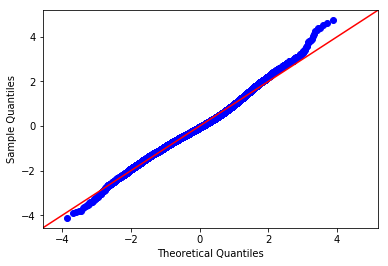

In [294]:
fig = sm.graphics.qqplot(resid, dist = stats.norm, line = '45', fit = True)

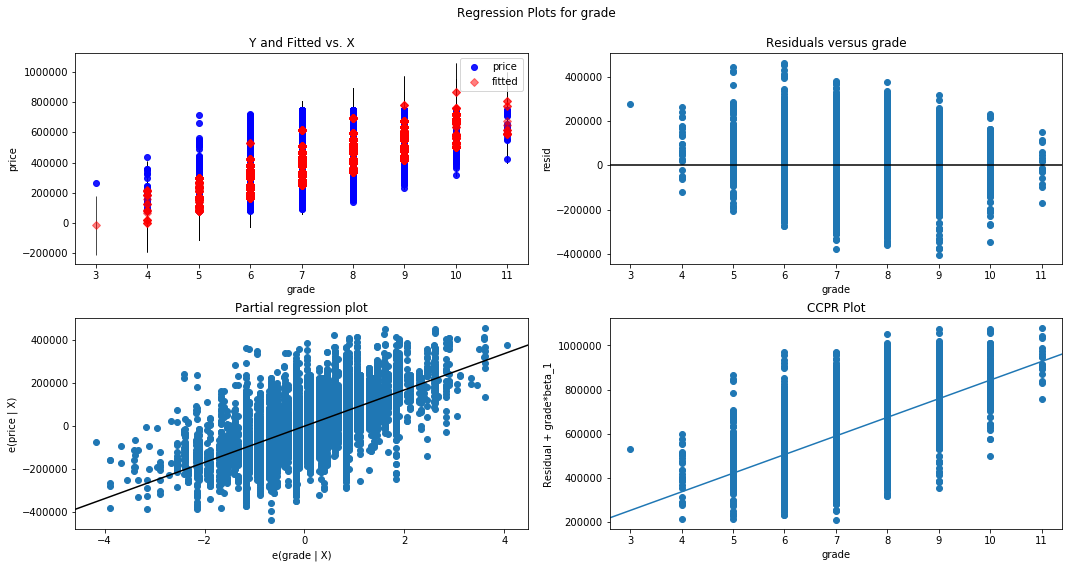

In [295]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

## Cross Validation

In [296]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [297]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-9662416175.670618
-9669100032.053278
-9616112603.472511
